In [ ]:
import numpy as np
import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras
from keras.applications import VGG16
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
IMAGE_SHAPE = (224, 224)

In [ ]:
%cd '/content/drive/MyDrive/disaster senarios'

/content/drive/MyDrive/disaster senarios


In [ ]:
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)
training_data='/content/drive/MyDrive/disaster senarios'
training_image_data  = image_generator.flow_from_directory(training_data,target_size=IMAGE_SHAPE)

Found 38 images belonging to 4 classes.


In [ ]:
training_image_data[1][1].shape

(6, 4)

In [ ]:
validation_data='/content/drive/MyDrive/disaster senarios'
validation_image_data  = image_generator.flow_from_directory(validation_data,target_size=IMAGE_SHAPE)

Found 38 images belonging to 4 classes.


In [ ]:
for image_batch, label_batch in training_image_data:
  print("Image batch shape: ", image_batch.shape)
  print("Label batch shape: ", label_batch.shape)
  break

Image batch shape:  (32, 224, 224, 3)
Label batch shape:  (32, 4)


In [ ]:
class_names = sorted(training_image_data.class_indices.items(), key=lambda pair:pair[1])
class_names = np.array([key.title() for key, value in class_names])
class_names

array(['Droughts', 'Flood', 'Landslide', 'Tsunami'], dtype='<U9')

In [ ]:
train_Data_Generator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [ ]:
train_image_generator = train_Data_Generator.flow_from_directory(
    training_data,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

Found 38 images belonging to 4 classes.


In [ ]:
validation_Data_Generator = ImageDataGenerator(rescale=1./255)

In [ ]:
validation_image_generator = validation_Data_Generator.flow_from_directory(
    validation_data,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 38 images belonging to 4 classes.


In [ ]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
sample_model = tf.keras.models.Sequential([
    base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(4, activation='softmax')
])

In [ ]:
sample_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = sample_model.fit(train_image_generator, epochs=10, validation_data=validation_image_generator)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2/2 ━━━━━━━━━━━━━━━━━━━━ 52s 45s/step - accuracy: 0.2135 - loss: 4.2479 - val_accuracy: 0.2895 - val_loss: 3.8055
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 45s 24s/step - accuracy: 0.2867 - loss: 4.4422 - val_accuracy: 0.2632 - val_loss: 3.3395
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 45s 25s/step - accuracy: 0.2308 - loss: 4.6529 - val_accuracy: 0.5263 - val_loss: 1.3648
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 45s 40s/step - accuracy: 0.5731 - loss: 2.7353 - val_accuracy: 0.5263 - val_loss: 2.9364
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 100s 44s/step - accuracy: 0.3706 - loss: 4.0903 - val_accuracy: 0.6053 - val_loss: 1.4527
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 64s 26s/step - accuracy: 0.6573 - loss: 1.4639 - val_accuracy: 0.8947 - val_loss: 0.3110
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 44s 25s/step - accuracy: 0.5559 - loss: 2.1868 - val_accuracy: 0.9211 - val_loss: 0.2561
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 82s 24s/step - accuracy: 0.5839 - loss: 1.4797 - val_accuracy: 0.9474 - val_loss: 0.2259
Epoch 9/10

In [ ]:
from tensorflow.keras.models import load_model

sample_model.save('sample_model.h5')


In [ ]:
arr = sample_model.predict(image_batch)
predicted_id = np.argmax(arr, axis=-1)
predicted_label_batch = class_names[predicted_id]
label_id = np.argmax(label_batch, axis=-1)
true_label_batch = class_names[label_id]

1/1 ━━━━━━━━━━━━━━━━━━━━ 19s 19s/step


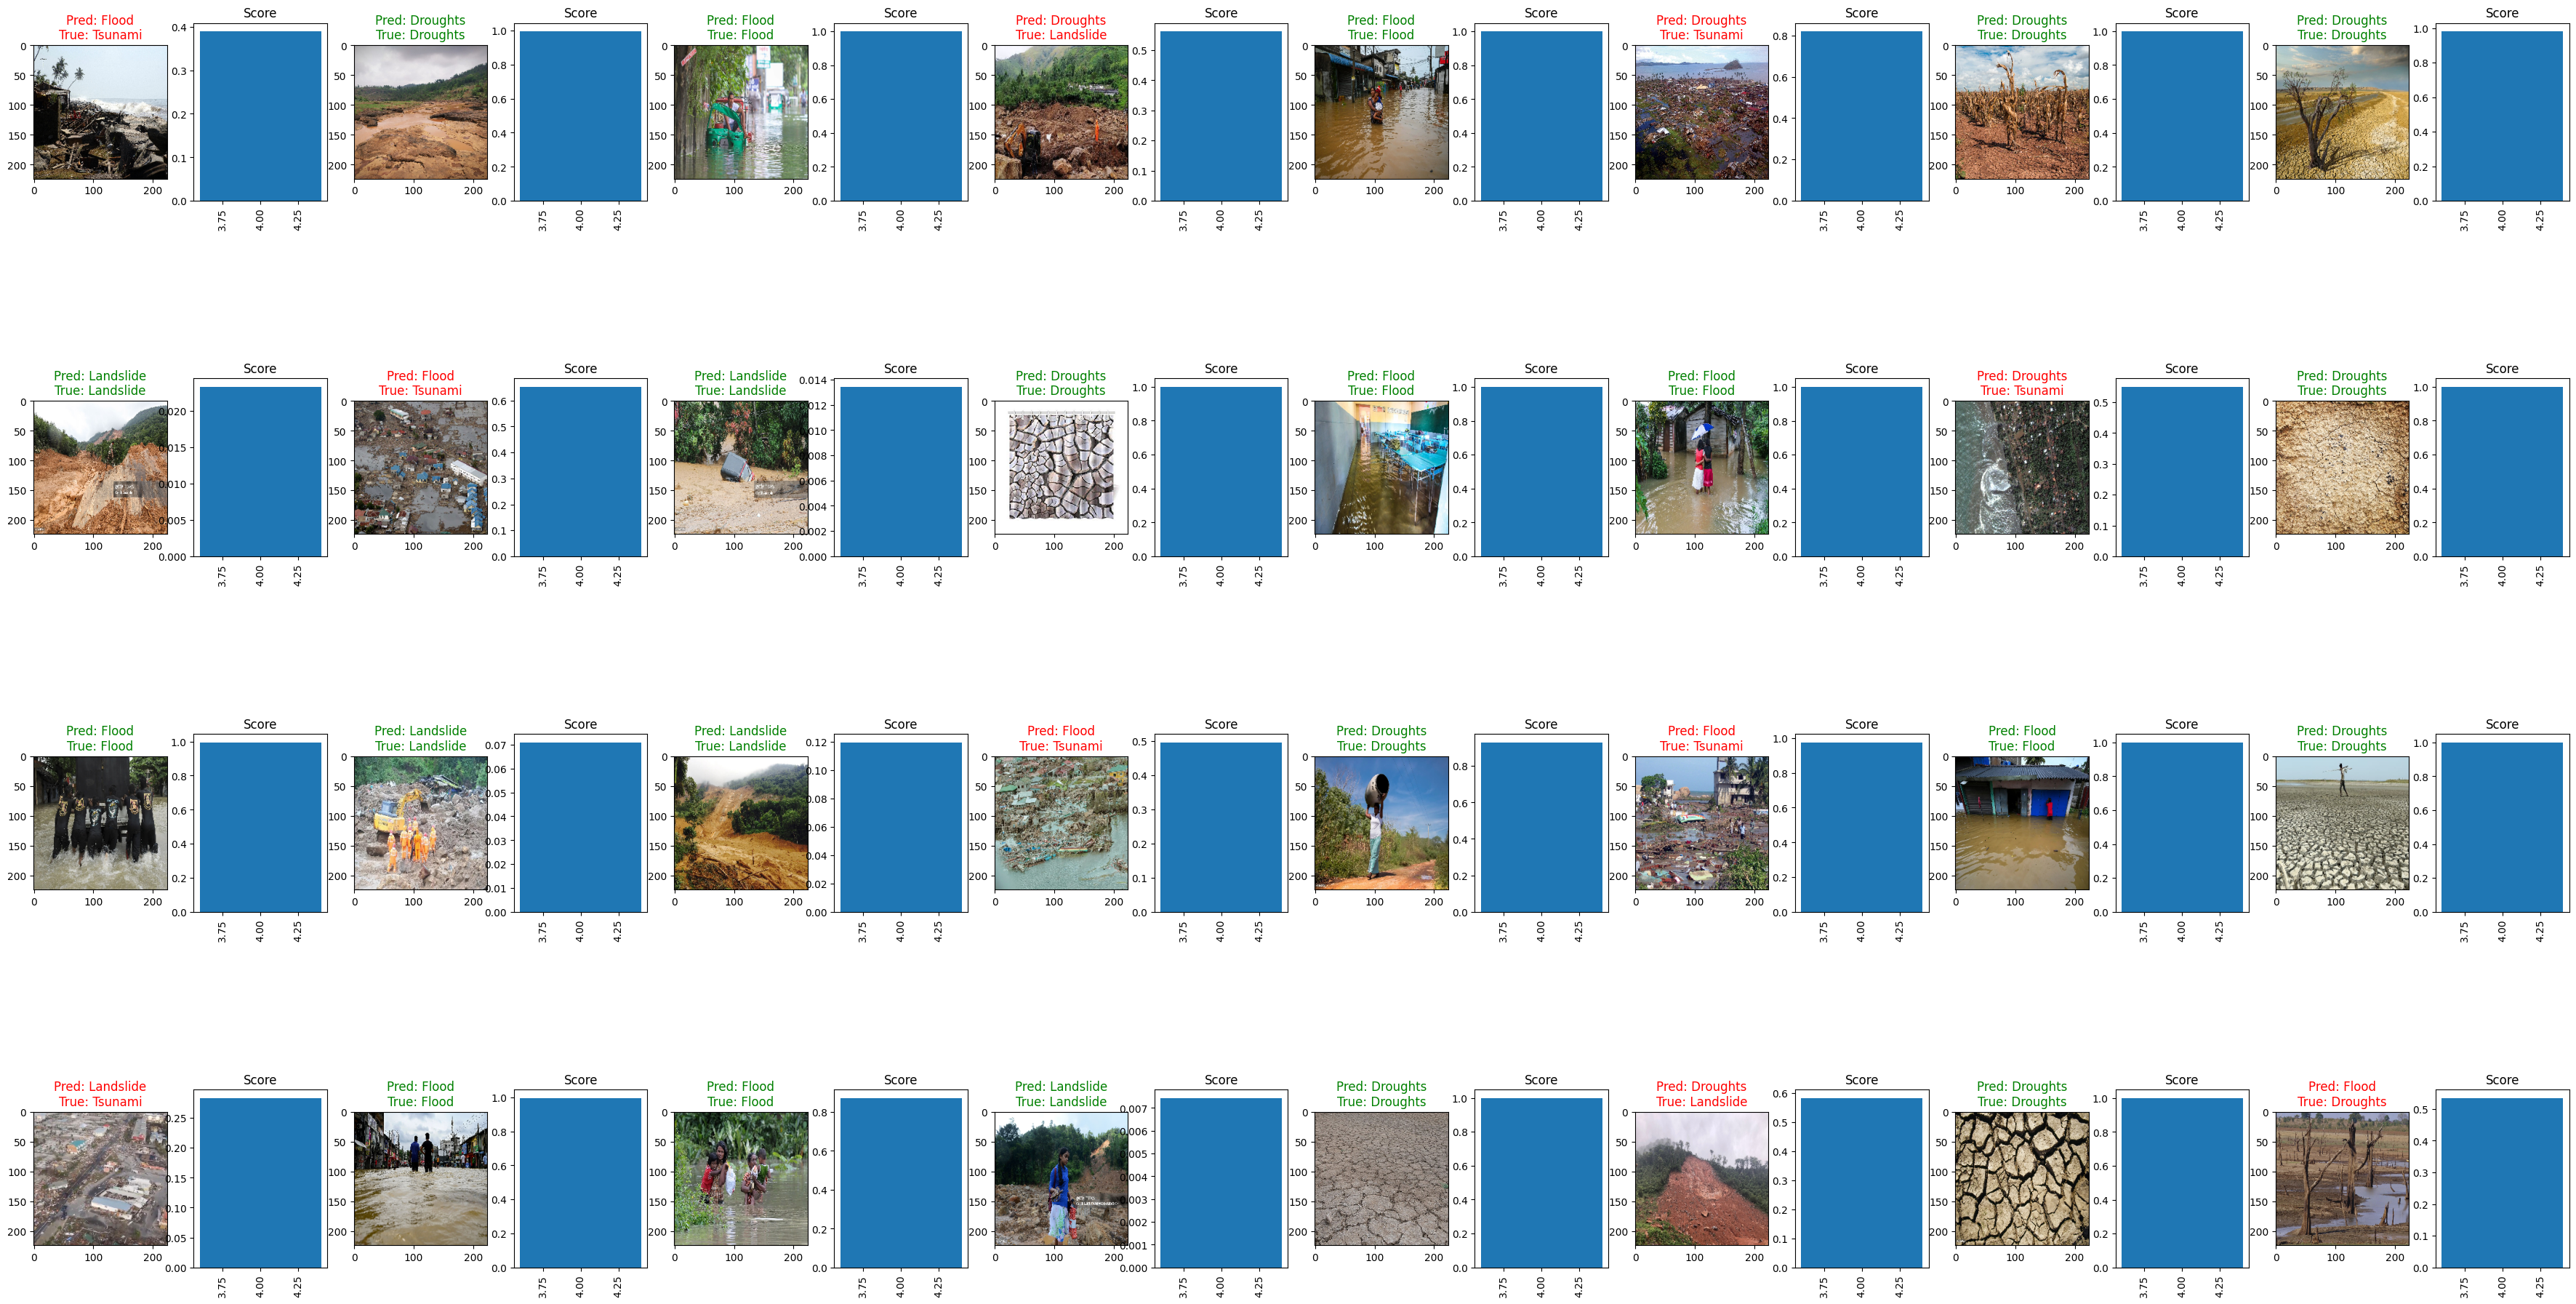

In [ ]:
img_counter=0
prob_counter=0

plt.figure(figsize=(45,200))
plt.subplots_adjust(hspace=1)
for n in range(64):

  plt.subplot(32,16,n+1)
  if(n%2==0):
      plt.imshow(image_batch[img_counter])
      color = "green" if predicted_id[img_counter] == label_id[img_counter] else "red"
      plt.title("Pred: "+predicted_label_batch[img_counter].title()+"\nTrue: "+true_label_batch[img_counter], color=color)
      img_counter=img_counter+1

  if(n%2==1):
      plt.title("Score", color="Black")

      data=[arr[prob_counter][0],arr[prob_counter][1]]

      plt.bar(4,data)
      plt.xticks(rotation='vertical')

      prob_counter=prob_counter+1

In [42]:
predicted_batch = sample_model.predict(image_batch)
predicted_id = np.argmax(predicted_batch, axis=-1)
label_id = np.argmax(label_batch, axis=-1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 31s 31s/step


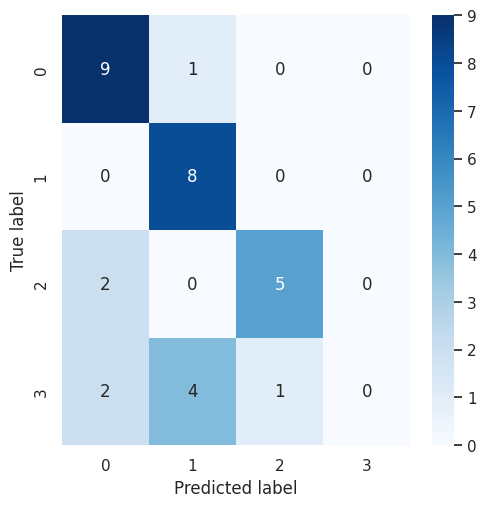

In [43]:
import matplotlib.pyplot as plt
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set_theme()

con_mat_df=tf.math.confusion_matrix(
    labels = label_id , predictions = predicted_id
)

figure = plt.figure(figsize=(5, 5))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [44]:
from sklearn.metrics import classification_report
print(classification_report(label_id, predicted_id, zero_division=0))

              precision    recall  f1-score   support

           0       0.69      0.90      0.78        10
           1       0.62      1.00      0.76         8
           2       0.83      0.71      0.77         7
           3       0.00      0.00      0.00         7

    accuracy                           0.69        32
   macro avg       0.54      0.65      0.58        32
weighted avg       0.55      0.69      0.60        32



In [45]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [46]:
model= tf.keras.models.load_model(
       ('sample_model.h5'),
       custom_objects={'KerasLayer':hub.KerasLayer}
)

In [47]:
img=image.load_img('/content/drive/MyDrive/disaster senarios/Flood/1732204814805.jpg',target_size=IMAGE_SHAPE)

In [48]:
x=image.img_to_array(img)
x.shape

(224, 224, 3)

In [ ]:
from tensorflow.keras.preprocessing import image

In [ ]:
img_array = image.img_to_array(img)
x=np.expand_dims(img_array,axis=0)
img_data=x/255.0
img_data.shape